# Modeling a Pin-Cell
In this module, we'll demonstrate the basic features of the Python API for constructing input files and running OpenMC. In it, we will show how to create a basic reflective pin-cell model that is equivalent to modeling an infinite array of fuel pins. We highly recommend having a copy of the [Python API reference documentation](https://docs.openmc.org/en/stable/pythonapi/index.html) open in another browser tab that you can refer to.

For this example, we'll create a pin-cell of the CEFR fuel assembly with simplified material compositions. More accurate material compositions will be applied as part of the exercise at the end of the day.

- UO<sub>2</sub>
- Helium
- Sodium
- Stainless Steel

all at a temperature of 523.15 K.

The dimensions of our fuel pin will be as follows:
- Fuel pin center hold radius = 0.08020 cm
- Fuel outer radius = 0.0.25565 cm
- Clad inner radius = 0.27112 cm
- Clad outer radius = 0.30499 cm
- Fuel pin pitch = 0.695 cm

In [1]:
import openmc

In [2]:
# remote any existing OpenMC input XMl files and output HDF5 files
!rm *.xml *.h5

## Naming Conventions

Before we start working with the Python API, it's helpful to understand the naming convention of objects so that you can conceptualize what is a function, what is a class, etc. OpenMC's Python interface follows the same naming convention that is adopted by many/most Python projects:

- Module names are `lowercase`
- Functions are `lowercase_with_underscores`
- Classes are `CamelCase`
- Class attributes/variables are `lowercase_with_underscores`
- Top-level (global) variables are `UPPERCASE_WITH_UNDERSCORES`

To give a few specific examples:

- `openmc.deplete` is the depletion _module_
- `openmc.run` is a _function_
- `openmc.Material` is a _class_
- `openmc.data.ATOMIC_NUMBER` is a _top-level variable_

## Setting Attributes

When building OpenMC models, we will work with many different classes. Each class typically has _attributes_, a variable belonging to the class. When creating a class, you can often set those attributes directly when you instantiate the object, like this:

In [3]:
m = openmc.Material(name='my_material')

In [4]:
m.name

'my_material'

In [5]:
help(openmc.Material)

Help on class Material in module openmc.material:

class Material(openmc.mixin.IDManagerMixin)
 |  Material(material_id=None, name='', temperature=None)
 |
 |  A material composed of a collection of nuclides/elements.
 |
 |  To create a material, one should create an instance of this class, add
 |  nuclides or elements with :meth:`Material.add_nuclide` or
 |  :meth:`Material.add_element`, respectively, and set the total material
 |  density with :meth:`Material.set_density()`. Alternatively, you can use
 |  :meth:`Material.add_components()` to pass a dictionary containing all the
 |  component information. The material can then be assigned to a cell using the
 |  :attr:`Cell.fill` attribute.
 |
 |  Parameters
 |  ----------
 |  material_id : int, optional
 |      Unique identifier for the material. If not specified, an identifier will
 |      automatically be assigned.
 |  name : str, optional
 |      Name of the material. If not specified, the name will be the empty
 |      string.
 |

Or, you can assign values to attributes after you have already created the object. For example, the following is equivalent to the above:

In [6]:
m.name = 'no_its_my_material'

In [7]:
print(m.name)

no_its_my_material


You can in general also mix-and-match, setting some attributes when you instantiate the object, and others at a later point.

In [8]:
m = openmc.Material(material_id=10)

In [9]:
m.id

10

In [10]:
m.name = 'now_i_have_a_name'

In [11]:
m.name

'now_i_have_a_name'


## How to Get Help/Learn More

When building OpenMC models, we recommend having a copy of the Python API documentation (linked earlier) open. You can also query information about classes and methods directly from Jupyter. For example, we can use `help` to get documentation on all of the valid attributes for functions and classes.

In [12]:
help(openmc.Cell)

Help on class Cell in module openmc.cell:

class Cell(openmc.mixin.IDManagerMixin)
 |  Cell(cell_id=None, name='', fill=None, region=None)
 |
 |  A region of space defined as the intersection of half-space created by
 |  quadric surfaces.
 |
 |  Parameters
 |  ----------
 |  cell_id : int, optional
 |      Unique identifier for the cell. If not specified, an identifier will
 |      automatically be assigned.
 |  name : str, optional
 |      Name of the cell. If not specified, the name is the empty string.
 |  fill : openmc.Material or openmc.UniverseBase or openmc.Lattice or None or iterable of openmc.Material, optional
 |      Indicates what the region of space is filled with
 |  region : openmc.Region, optional
 |      Region of space that is assigned to the cell.
 |
 |  Attributes
 |  ----------
 |  id : int
 |      Unique identifier for the cell
 |  name : str
 |      Name of the cell
 |  fill : openmc.Material or openmc.UniverseBase or openmc.Lattice or None or iterable of openmc.

Attributes which have a default value will appear as `<attribute>=<the default value>` in the class/function definition. For classes, all of the member functions you can access will then be defined further down, with their associated documentation. To see documentation for just one specific function, you can use syntax like:

In [13]:
my_cell = openmc.Cell()
help(my_cell.from_xml_element)

Help on method from_xml_element in module openmc.cell:

from_xml_element(elem, surfaces, materials, get_universe) method of builtins.type instance
    Generate cell from XML element

    Parameters
    ----------
    elem : lxml.etree._Element
        `<cell>` element
    surfaces : dict
        Dictionary mapping surface IDs to :class:`openmc.Surface` instances
    materials : dict
        Dictionary mapping material ID strings to :class:`openmc.Material`
        instances (defined in :math:`openmc.Geometry.from_xml`)
    get_universe : function
        Function returning universe (defined in
        :meth:`openmc.Geometry.from_xml`)

    Returns
    -------
    openmc.Cell
        Cell instance



You can also query the type of a particular object using `type`. Note that we can also display the attributes for a particular object using `print`.

In [14]:
type(my_cell)
print(my_cell)

Cell
	ID             =	1
	Name           =	
	Fill           =	None
	Region         =	None
	Rotation       =	None
	Translation    =	None
	Volume         =	None



In [15]:
print(m)

Material
	ID             =	10
	Name           =	now_i_have_a_name
	Temperature    =	None
	Density        =	None [sum]
	Volume         =	None [cm^3]
	Depletable     =	False
	S(a,b) Tables  
	Nuclides       



In [16]:
new_cell = openmc.Cell()
print(new_cell)

Cell
	ID             =	2
	Name           =	
	Fill           =	None
	Region         =	None
	Rotation       =	None
	Translation    =	None
	Volume         =	None



## Defining Materials

Materials in OpenMC are defined as a set of nuclides with specified atom/weight fractions. To begin, we will create a material by making an instance of the `Material` class. In OpenMC, many objects, including materials, are identified by a "unique ID" that is simply just a positive integer. These IDs are used when exporting XML files that the solver reads in. They also appear in the output and can be used for identification. Since an integer ID is not very useful by itself, you can also give a material a `name` as well.

In [17]:
uo2 = openmc.Material(name='fuel')

If you don't give an ID, one will be automatically generated for you:

In [18]:
print(uo2)

Material
	ID             =	2
	Name           =	fuel
	Temperature    =	None
	Density        =	None [sum]
	Volume         =	None [cm^3]
	Depletable     =	False
	S(a,b) Tables  
	Nuclides       



We see that an ID of 2 was automatically assigned. Let's now move on to adding nuclides to our `uo2` material. The `Material` object has a method `add_nuclide()` whose first argument is the name of the nuclide and second argument is the atom or weight fraction.

In [19]:
help(uo2.add_nuclide)

Help on method add_nuclide in module openmc.material:

add_nuclide(nuclide: 'str', percent: 'float', percent_type: 'str' = 'ao') method of openmc.material.Material instance
    Add a nuclide to the material

    Parameters
    ----------
    nuclide : str
        Nuclide to add, e.g., 'Mo95'
    percent : float
        Atom or weight percent
    percent_type : {'ao', 'wo'}
        'ao' for atom percent and 'wo' for weight percent



In [20]:
uo2.add_nuclide('U235', 1.49E-02, 'ao')
uo2.add_nuclide('U238', 8.26E-02, 'ao')
uo2.add_nuclide('O16', 4.69E-03, 'ao')

In [21]:
print(uo2)

Material
	ID             =	2
	Name           =	fuel
	Temperature    =	None
	Density        =	None [sum]
	Volume         =	None [cm^3]
	Depletable     =	True
	S(a,b) Tables  
	Nuclides       
	U235           =	0.0149       [ao]
	U238           =	0.0826       [ao]
	O16            =	0.00469      [ao]



We see that by default it assumes we want an atom fraction.

Now we need to assign a total density to the material. We'll use the `set_density` for this.

In [22]:
help(uo2.set_density)

Help on method set_density in module openmc.material:

set_density(units: 'str', density: 'Optional[float]' = None) method of openmc.material.Material instance
    Set the density of the material

    Parameters
    ----------
    units : {'g/cm3', 'g/cc', 'kg/m3', 'atom/b-cm', 'atom/cm3', 'sum', 'macro'}
        Physical units of density.
    density : float, optional
        Value of the density. Must be specified unless units is given as
        'sum'.



In [23]:
uo2.set_density('atom/b-cm', 7.021E-02)

In [24]:
print(uo2)

Material
	ID             =	2
	Name           =	fuel
	Temperature    =	None
	Density        =	0.07021 [atom/b-cm]
	Volume         =	None [cm^3]
	Depletable     =	True
	S(a,b) Tables  
	Nuclides       
	U235           =	0.0149       [ao]
	U238           =	0.0826       [ao]
	O16            =	0.00469      [ao]



In [25]:
steel = openmc.Material(name='steel')
steel.set_density('atom/b-cm', 0.49E-02)
steel.add_element('Fe', 0.995)
steel.add_element('C', 0.005)

In [26]:
print(steel)

Material
	ID             =	3
	Name           =	steel
	Temperature    =	None
	Density        =	0.0049 [atom/b-cm]
	Volume         =	None [cm^3]
	Depletable     =	False
	S(a,b) Tables  
	Nuclides       
	Fe54           =	0.05815775   [ao]
	Fe56           =	0.9129523    [ao]
	Fe57           =	0.02108405   [ao]
	Fe58           =	0.0028059    [ao]
	C12            =	0.00494461   [ao]
	C13            =	5.5389999999999997e-05 [ao]



You may sometimes be given a material specification where all the nuclide densities are in units of atom/b-cm. In this case, you just want the density to be the sum of the constituents. In that case, you can simply run `mat.set_density('sum')`.

With UO2 finished, let's now create materials for the clad and coolant. Note the use of `add_element()` for zirconium.

In [27]:
he4 = openmc.Material(name='helium')
he4.set_density('sum')
he4.add_element('He', 1E-11)

sodium = openmc.Material(name='sodium')
sodium.set_density('sum')
sodium.add_nuclide('Na23', 2.33E-02)

In [28]:
print(he4)

Material
	ID             =	4
	Name           =	helium
	Temperature    =	None
	Density        =	None [sum]
	Volume         =	None [cm^3]
	Depletable     =	False
	S(a,b) Tables  
	Nuclides       
	He3            =	1.9999999999999998e-17 [ao]
	He4            =	9.999979999999999e-12 [ao]



In [29]:
print(sodium)

Material
	ID             =	5
	Name           =	sodium
	Temperature    =	None
	Density        =	None [sum]
	Volume         =	None [cm^3]
	Depletable     =	False
	S(a,b) Tables  
	Nuclides       
	Na23           =	0.0233       [ao]



### Element Expansion

Did you notice something really cool that happened to our Fe and C elements? OpenMC automatically turned it into a list of nuclides when it exported it! The way this feature works is as follows:

- First, it checks whether `Materials.cross_sections` has been set, indicating the path to a `cross_sections.xml` file.
- If `Materials.cross_sections` isn't set, it looks for the `OPENMC_CROSS_SECTIONS` environment variable.
- If either of these is found, it scans the file to see what nuclides are actually available and will expand elements accordingly.

In [30]:
#openmc.config['cross_sections'] = '/home/efra/simulations/openmc/data/endfb-vii.1-hdf5/cross_sections.xml'
openmc.config['cross_sections'] = '/home/efra/simulations/openmc/data/endfb-viii.0-hdf5/cross_sections.xml'

In [31]:
openmc.config

{'cross_sections': PosixPath('/home/efra/simulations/openmc/data/endfb-viii.0-hdf5/cross_sections.xml')}

---
## An aside on S($\alpha$, $\beta$) tables

For systems with a significant thermal component to the neutron flux, it is important to augment the free atom cross sections we've used up to this point when possible. This can be done by using an $S(\alpha,\beta)$ table so that the bound atom cross section is used at thermal energies. To do this, there's an `add_s_alpha_beta()` method. Note the use of the GND-style name "c_H_in_H2O".

```python
water.add_s_alpha_beta('c_H_in_H2O')
```

---

When we go to run the transport solver in OpenMC, it is going to look for a `materials.xml` file. Thus far, we have only created objects in memory. To actually create a `materials.xml` file, we need to instantiate a `Materials` collection and export it to XML.

In [32]:
materials = openmc.Materials([uo2, steel])

In [33]:
print(materials)

[Material
	ID             =	2
	Name           =	fuel
	Temperature    =	None
	Density        =	0.07021 [atom/b-cm]
	Volume         =	None [cm^3]
	Depletable     =	True
	S(a,b) Tables  
	Nuclides       
	U235           =	0.0149       [ao]
	U238           =	0.0826       [ao]
	O16            =	0.00469      [ao]
, Material
	ID             =	3
	Name           =	steel
	Temperature    =	None
	Density        =	0.0049 [atom/b-cm]
	Volume         =	None [cm^3]
	Depletable     =	False
	S(a,b) Tables  
	Nuclides       
	Fe54           =	0.05815775   [ao]
	Fe56           =	0.9129523    [ao]
	Fe57           =	0.02108405   [ao]
	Fe58           =	0.0028059    [ao]
	C12            =	0.00494461   [ao]
	C13            =	5.5389999999999997e-05 [ao]
]


Note that `Materials` is actually a subclass of Python's built-in `list`, so we can use methods like `append()`, `insert()`, `pop()`, etc.

In [34]:
materials.append(he4)
materials.append(sodium)

In [35]:
print(materials)

[Material
	ID             =	2
	Name           =	fuel
	Temperature    =	None
	Density        =	0.07021 [atom/b-cm]
	Volume         =	None [cm^3]
	Depletable     =	True
	S(a,b) Tables  
	Nuclides       
	U235           =	0.0149       [ao]
	U238           =	0.0826       [ao]
	O16            =	0.00469      [ao]
, Material
	ID             =	3
	Name           =	steel
	Temperature    =	None
	Density        =	0.0049 [atom/b-cm]
	Volume         =	None [cm^3]
	Depletable     =	False
	S(a,b) Tables  
	Nuclides       
	Fe54           =	0.05815775   [ao]
	Fe56           =	0.9129523    [ao]
	Fe57           =	0.02108405   [ao]
	Fe58           =	0.0028059    [ao]
	C12            =	0.00494461   [ao]
	C13            =	5.5389999999999997e-05 [ao]
, Material
	ID             =	4
	Name           =	helium
	Temperature    =	None
	Density        =	None [sum]
	Volume         =	None [cm^3]
	Depletable     =	False
	S(a,b) Tables  
	Nuclides       
	He3            =	1.9999999999999998e-17 [ao]
	He4            =	9.

Finally, we can create the XML file with the `export_to_xml()` method. In a Jupyter notebook, we can run a shell command by putting `!` before it, so in this case we are going to display the `materials.xml` file that we created.

In [36]:
materials.export_to_xml()

We see that now He3 and He4 were automatically added. Other isotopes are missing because our cross sections file (which is based on ENDF/B-VII.1) doesn't contain data for them. If OpenMC didn't know about the cross sections file, it would have assumed that all isotopes exist.

### Materials from a chemical formula

In [37]:
water = openmc.Material(name='water')
water.set_density('g/cc', 1.0)
water.add_elements_from_formula('H2O')
print(water)

Material
	ID             =	6
	Name           =	water
	Temperature    =	None
	Density        =	1.0 [g/cc]
	Volume         =	None [cm^3]
	Depletable     =	False
	S(a,b) Tables  
	Nuclides       
	H1             =	0.66656284   [ao]
	H2             =	0.00010382666666666666 [ao]
	O16            =	0.33254019999999995 [ao]
	O17            =	0.00012633333333333333 [ao]
	O18            =	0.0006667999999999999 [ao]



### Material mixtures

In [38]:
help(openmc.Material.mix_materials)

Help on method mix_materials in module openmc.material:

mix_materials(materials, fracs: 'typing.Iterable[float]', percent_type: 'str' = 'ao', name: 'Optional[str]' = None) -> 'Material' method of builtins.type instance
    Mix materials together based on atom, weight, or volume fractions

    .. versionadded:: 0.12

    Parameters
    ----------
    materials : Iterable of openmc.Material
        Materials to combine
    fracs : Iterable of float
        Fractions of each material to be combined
    percent_type : {'ao', 'wo', 'vo'}
        Type of percentage, must be one of 'ao', 'wo', or 'vo', to signify atom
        percent (molar percent), weight percent, or volume percent,
        optional. Defaults to 'ao'
    name : str
        The name for the new material, optional. Defaults to concatenated
        names of input materials with percentages indicated inside
        parentheses.

    Returns
    -------
    openmc.Material
        Mixture of the materials



In [39]:
sodium_and_steel = openmc.Material.mix_materials([sodium, steel], [0.9, 0.1], 'ao', name='sodium_and_steel')
print(sodium_and_steel)

Material
	ID             =	7
	Name           =	sodium_and_steel
	Temperature    =	None
	Density        =	0.7384593392817108 [g/cm3]
	Volume         =	None [cm^3]
	Depletable     =	False
	S(a,b) Tables  
	Nuclides       
	Na23           =	0.9          [ao]
	Fe54           =	0.005815775000000001 [ao]
	Fe56           =	0.09129523000000002 [ao]
	Fe57           =	0.0021084050000000007 [ao]
	Fe58           =	0.00028059000000000005 [ao]
	C12            =	0.0004944610000000001 [ao]
	C13            =	5.539e-06    [ao]



### The `cross_sections.xml` file

The `cross_sections.xml` tells OpenMC where it can find nuclide cross sections and $S(\alpha,\beta)$ tables. It serves the same purpose as MCNP's `xsdir` file and Serpent's `xsdata` file. As we mentioned, this can be set either by the `OPENMC_CROSS_SECTIONS` environment variable or the `Materials.cross_sections` attribute.

Let's have a look at what's inside this file:

In [40]:
!cat $OPENMC_CROSS_SECTIONS | head -n 30
print('   ...')
!cat $OPENMC_CROSS_SECTIONS | tail -n 10

<?xml version='1.0' encoding='utf-8'?>
<cross_sections>
  <library materials="H1" path="neutron/H1.h5" type="neutron" />
  <library materials="H2" path="neutron/H2.h5" type="neutron" />
  <library materials="H3" path="neutron/H3.h5" type="neutron" />
  <library materials="He3" path="neutron/He3.h5" type="neutron" />
  <library materials="He4" path="neutron/He4.h5" type="neutron" />
  <library materials="Li6" path="neutron/Li6.h5" type="neutron" />
  <library materials="Li7" path="neutron/Li7.h5" type="neutron" />
  <library materials="Be7" path="neutron/Be7.h5" type="neutron" />
  <library materials="Be9" path="neutron/Be9.h5" type="neutron" />
  <library materials="B10" path="neutron/B10.h5" type="neutron" />
  <library materials="B11" path="neutron/B11.h5" type="neutron" />
  <library materials="C12" path="neutron/C12.h5" type="neutron" />
  <library materials="C13" path="neutron/C13.h5" type="neutron" />
  <library materials="N14" path="neutron/N14.h5" type="neutron" />
  <library m

The cross section dataset used by OpenMC can also be configured using the `openmc.config` property of the `openmc` module. Setting this property inside a Python interpreter session is equivalent to updating the cross sections environment variable discussed above.

In [41]:
# openmc.config['cross_sections'] = /path/to/my/xs/data/cross_sections.xml

### Enrichment

Note that the `add_element()` method has a special argument `enrichment` that can be used for Uranium. For example, if we know that we want to create 3% enriched UO2, the following would work:

In [42]:
help(openmc.Material.add_element)

Help on function add_element in module openmc.material:

add_element(self, element: 'str', percent: 'float', percent_type: 'str' = 'ao', enrichment: 'Optional[float]' = None, enrichment_target: 'Optional[str]' = None, enrichment_type: 'Optional[str]' = None, cross_sections: 'Optional[str]' = None)
    Add a natural element to the material

    Parameters
    ----------
    element : str
        Element to add, e.g., 'Zr' or 'Zirconium'
    percent : float
        Atom or weight percent
    percent_type : {'ao', 'wo'}, optional
        'ao' for atom percent and 'wo' for weight percent. Defaults to atom
        percent.
    enrichment : float, optional
        Enrichment of an enrichment_target nuclide in percent (ao or wo).
        If enrichment_target is not supplied then it is enrichment for U235
        in weight percent. For example, input 4.95 for 4.95 weight percent
        enriched U.
        Default is None (natural composition).
    enrichment_target: str, optional
        Sing

In [43]:
uranium = openmc.Material(name='fake_fuel')
uranium.add_element('U', 1.0, 'ao', enrichment=3.0)
print(uranium)

Material
	ID             =	8
	Name           =	fake_fuel
	Temperature    =	None
	Density        =	None [sum]
	Volume         =	None [cm^3]
	Depletable     =	True
	S(a,b) Tables  
	Nuclides       
	U234           =	0.0002714687807976247 [ao]
	U235           =	0.030371951808732825 [ao]
	U238           =	0.9692174612830511 [ao]
	U236           =	0.00013911812741848606 [ao]



In [44]:
print(materials)

[Material
	ID             =	2
	Name           =	fuel
	Temperature    =	None
	Density        =	0.07021 [atom/b-cm]
	Volume         =	None [cm^3]
	Depletable     =	True
	S(a,b) Tables  
	Nuclides       
	U235           =	0.0149       [ao]
	U238           =	0.0826       [ao]
	O16            =	0.00469      [ao]
, Material
	ID             =	3
	Name           =	steel
	Temperature    =	None
	Density        =	0.0049 [atom/b-cm]
	Volume         =	None [cm^3]
	Depletable     =	False
	S(a,b) Tables  
	Nuclides       
	Fe54           =	0.05815775   [ao]
	Fe56           =	0.9129523    [ao]
	Fe57           =	0.02108405   [ao]
	Fe58           =	0.0028059    [ao]
	C12            =	0.00494461   [ao]
	C13            =	5.5389999999999997e-05 [ao]
, Material
	ID             =	4
	Name           =	helium
	Temperature    =	None
	Density        =	None [sum]
	Volume         =	None [cm^3]
	Depletable     =	False
	S(a,b) Tables  
	Nuclides       
	He3            =	1.9999999999999998e-17 [ao]
	He4            =	9.

---

## Defining Geometry

At this point, we have three materials defined, exported to XML, and ready to be used in our model. To finish our model, we need to define the geometric arrangement of materials. OpenMC represents physical volumes using constructive solid geometry (CSG), also known as combinatorial geometry. The object that allows us to assign a material to a region of space is called a `Cell` (same concept in MCNP, for those familiar). There are four major stages in building a cell:

### Surfaces
In order to define a region that we can assign to a cell, we must first define surfaces which bound the region. A *surface* is a locus of zeros of a function of Cartesian coordinates $x$, $y$, and $z$, e.g.

- A plane perpendicular to the x axis: $x - x_0 = 0$
- A cylinder parallel to the z axis: $(x - x_0)^2 + (y - y_0)^2 - R^2 = 0$
- A sphere: $(x - x_0)^2 + (y - y_0)^2 + (z - z_0)^2 - R^2 = 0$

Between those three classes of surfaces (planes, cylinders, spheres), one can construct a wide variety of models. It is also possible to define cones and general second-order surfaces.

### Half-Spaces
Note that defining a surface is not sufficient to specify a volume -- in order to define an actual volume, one must reference the half-space of a surface. A surface *half-space* is the region whose points satisfy a positive or negative inequality of the surface equation. For example, for a sphere of radius one centered at the origin, the surface equation is $f(x,y,z) = x^2 + y^2 + z^2 - 1 = 0$. Thus, we say that the negative half-space of the sphere, is defined as the collection of points satisfying $f(x,y,z) < 0$, which one can reason is the inside of the sphere. Conversely, the positive half-space of the sphere would correspond to all points outside of the sphere.

### Regions
A region is then a combination (or just one) half-space.

### Cells

A Cell ties a region together with a "fill" (see below). Cells can be grouped together into `Universes` to produce replicated geometry (discussed in more detail later).

### Fills
Finally, a cell is complete once we have defined what is _filling_ the cell, which may be one of:

- material
- nothing (`None`), or vacuum/void
- universe
- lattice

In [45]:
help(openmc.Sphere)

Help on class Sphere in module openmc.surface:

class Sphere(QuadricMixin, Surface)
 |  Sphere(x0=0.0, y0=0.0, z0=0.0, r=1.0, *args, **kwargs)
 |
 |  A sphere of the form :math:`(x - x_0)^2 + (y - y_0)^2 + (z - z_0)^2 = r^2`.
 |
 |  Parameters
 |  ----------
 |  x0 : float, optional
 |      x-coordinate of the center of the sphere in [cm]. Defaults to 0.
 |  y0 : float, optional
 |      y-coordinate of the center of the sphere in [cm]. Defaults to 0.
 |  z0 : float, optional
 |      z-coordinate of the center of the sphere in [cm]. Defaults to 0.
 |  r : float, optional
 |      Radius of the sphere in [cm]. Defaults to 1.
 |  boundary_type : {'transmission, 'vacuum', 'reflective', 'white'}, optional
 |      Boundary condition that defines the behavior for particles hitting the
 |      surface. Defaults to transmissive boundary condition where particles
 |      freely pass through the surface.
 |  albedo : float, optional
 |      Albedo of the surfaces as a ratio of particle weight afte

In [46]:
sphere = openmc.Sphere(r=1.0, boundary_type='transmission')
print(sphere)

Surface
	ID                 =	1
	Name               =	
	Type               =	sphere
	Boundary           =	transmission
	Coefficients       
x0                  =	0.0
y0                  =	0.0
z0                  =	0.0
r                   =	1.0



Note that by default the sphere is centered at the origin so we didn't have to supply `x0`, `y0`, or `z0` arguments. Strictly speaking, we could have omitted `r` as well since it defaults to one. To get the negative or positive half-space, we simply need to apply the `-` or `+` unary operators, respectively.

(NOTE: Those unary operators are defined by special methods: `__pos__` and `__neg__` in this case).

In [47]:
inside_sphere = -sphere
type(inside_sphere)

openmc.surface.Halfspace

Now let's see if `inside_sphere` actually contains points inside the sphere:

In [48]:
(0, 0, 0) in inside_sphere

True

In [49]:
(2, 3, 0) in inside_sphere

False

In [50]:
outside_sphere = +sphere
(2, 3, 0) in outside_sphere

True

Everything works as expected! Now that we understand how to create half-spaces, we can create more complex volumes by combining half-spaces using Boolean operators: `&` (intersection), `|` (union), and `~` (complement):

- `&`: logical AND
- `|`: logical OR
- `~`: logical NOT

For example, let's say we want to define a region that is the top part of the sphere (all points inside the sphere that have $z > 0$.

In [51]:
z_plane = openmc.ZPlane(z0=0)

In [52]:
northern_hemisphere = -sphere & +z_plane

In [53]:
(0, 0, -0.5) in northern_hemisphere

False

For many regions, OpenMC can automatically determine a bounding box. To get the bounding box, we use the `bounding_box` property of a region, which returns a tuple of the lower-left and upper-right Cartesian coordinates for the bounding box:

In [54]:
northern_hemisphere.bounding_box

BoundingBox(lower_left=(-1.0, -1.0, 0.0), upper_right=(1.0, 1.0, 1.0))

Now that we see how to create volumes, we can use them to create a cell.

The full [list of available surfaces](https://docs.openmc.org/en/stable/pythonapi/base.html#building-geometry) is as follows.

Planes:

- `openmc.Plane` — An arbitrary plane of the form $Ax + By + Cz = D$
- `openmc.XPlane` — A plane perpendicular to the x axis of the form $x - x_0 = 0$
- `openmc.YPlane` — A plane perpendicular to the y axis of the form $y - y_0 = 0$
- `openmc.ZPlane` — A plane perpendicular to the z axis of the form $z - z_0 = 0$

Quadrics:

- `openmc.XCylinder` — An infinite cylinder whose length is parallel to the x-axis of the form $(y - y_0)^2 + (z - z_0)^2 = r^2$
- `openmc.YCylinder` — An infinite cylinder whose length is parallel to the x-axis of the form $(x - x_0)^2 + (z - z_0)^2 = r^2$
- `openmc.ZCylinder` — An infinite cylinder whose length is parallel to the x-axis of the form $(x - x_0)^2 + (y - y_0)^2 = r^2$
- `openmc.Sphere` — A sphere of the form $(x - x_0)^2 + (y - y_0)^2 + (z - z_0)^2 = r^2$
- `openmc.XCone` — A cone parallel to the x-axis of the form $(y - y_0)^2 + (z - z_0)^2 = r^2 (x - x_0)^2$
- `openmc.YCone` — A cone parallel to the y-axis of the form $(x - x_0)^2 + (z - z_0)^2 = r^2 (y - y_0)^2$
- `openmc.ZCone` — A cone parallel to the z-axis of the form $(x - x_0)^2 + (y - y_0)^2 = r^2 (z - z_0)^2$
- `openmc.Quadric` — A generic quadric surface

Torii:

- `openmc.XTorus` — A torus of the form $(x - x_0)^2/B^2 + (\sqrt{(y - y_0)^2 + (z - z_0)^2} - A)^2/C^2 - 1 = 0$
- `openmc.YTorus` — A torus of the form $(y - y_0)^2/B^2 + (\sqrt{(x - x_0)^2 + (z - z_0)^2} - A)^2/C^2 - 1 = 0$
- `openmc.ZTorus` — A torus of the form $(z - z_0)^2/B^2 + (\sqrt{(x - x_0)^2 + (y - y_0)^2} - A)^2/C^2 - 1 = 0$

### Boundary Conditions

When you create a surface, by default particles that pass through the surface will consider it to be transmissive, i.e. they pass through the surface freely. To specify boundary conditions, you simply need to set the `Surface.boundary_type` to one of:

- `vacuum`
- `reflective`
- `periodic` (either rotational or translational)
- `white`

In [55]:
sphere.boundary_type = 'vacuum'

In [56]:
print(sphere)

Surface
	ID                 =	1
	Name               =	
	Type               =	sphere
	Boundary           =	vacuum
	Coefficients       
x0                  =	0.0
y0                  =	0.0
z0                  =	0.0
r                   =	1.0



By default, the cell is not filled by any material (void). In order to assign a material, we set the `fill` property of a `Cell`.

In [57]:
cell = openmc.Cell()
print(cell)

Cell
	ID             =	3
	Name           =	
	Fill           =	None
	Region         =	None
	Rotation       =	None
	Translation    =	None
	Volume         =	None



In [58]:
cell.fill = steel
cell.region = northern_hemisphere

In [59]:
print(cell)

Cell
	ID             =	3
	Name           =	
	Fill           =	Material 3
	Region         =	(-1 2)
	Rotation       =	None
	Temperature    =	None
	Translation    =	None
	Volume         =	None



## Universes and in-line plotting

A collection of cells is known as a universe (again, this will be familiar to MCNP/Serpent users) and can be used as a repeatable unit when creating a model. Although we don't need it yet, the benefit of creating a universe is that we can visualize our geometry while we're creating it.

In [60]:
universe = openmc.Universe(cells = [cell])

In [61]:
universe.add_cell

<bound method Universe.add_cell of Universe
	ID             =	1
	Name           =	
	Geom           =	CSG
	Cells          =	[3]
>

The `Universe` object has a `plot` method that will display our the universe as current constructed:

In [62]:
help(universe.plot)

Help on method plot in module openmc.universe:

plot(origin=None, width=None, pixels=40000, basis='xy', color_by='cell', colors=None, seed=None, openmc_exec='openmc', axes=None, legend=False, axis_units='cm', legend_kwargs={'bbox_to_anchor': (1.05, 1), 'loc': 2, 'borderaxespad': 0.0}, outline=False, **kwargs) method of openmc.universe.Universe instance
    Display a slice plot of the universe.

    Parameters
    ----------
    origin : iterable of float
        Coordinates at the origin of the plot. If left as None,
        universe.bounding_box.center will be used to attempt to ascertain
        the origin with infinite values being replaced by 0.
    width : iterable of float
        Width of the plot in each basis direction. If left as none then the
        universe.bounding_box.width() will be used to attempt to
        ascertain the plot width.  Defaults to (10, 10) if the bounding_box
        contains inf values
    pixels : Iterable of int or int
        If iterable of ints pro

<Axes: xlabel='x [cm]', ylabel='y [cm]'>

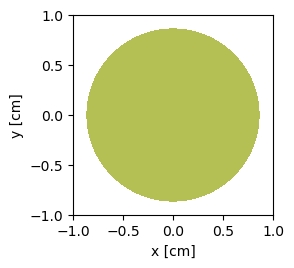

In [63]:
universe.plot(width=(2.0, 2.0))

By default, the plot will appear in the $x$-$y$ plane. We can change that with the `basis` argument.

<Axes: xlabel='x [cm]', ylabel='z [cm]'>

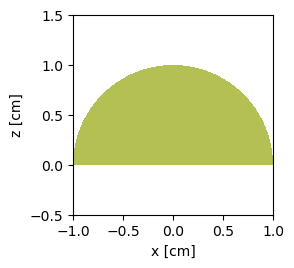

In [64]:
universe.plot(width=(2.0, 2.0), basis='xz')

If we have particular fondness for, say, fuchsia, we can tell the `plot()` method to make our cell that color.

In [65]:
colors = {cell: 'blue'} # or by RGB. Grey would be (75, 75, 75)

<Axes: xlabel='x [cm]', ylabel='z [cm]'>

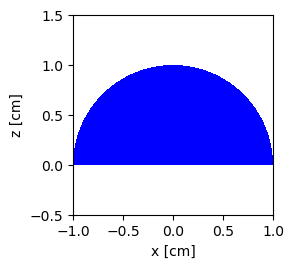

In [66]:
universe.plot(width=(2.0, 2.0), basis='xz', colors=colors)

<Axes: xlabel='x [cm]', ylabel='z [cm]'>

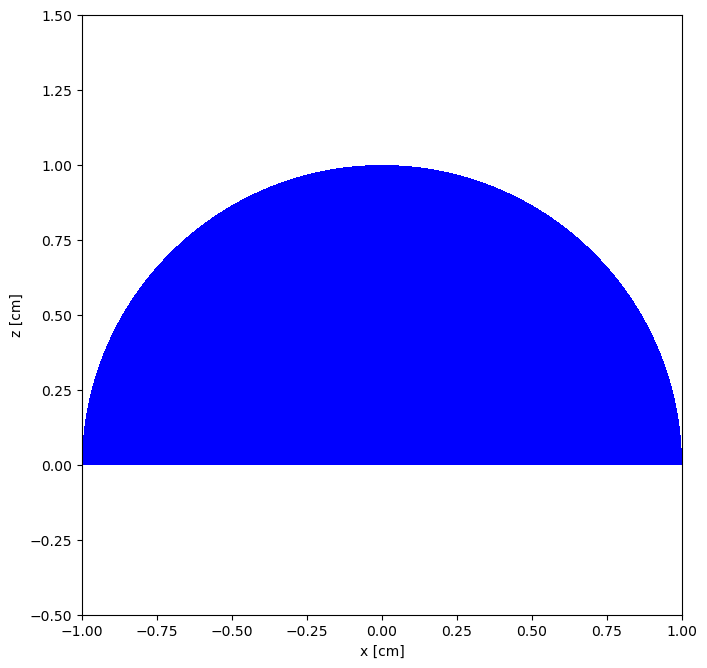

In [67]:
universe.plot(width=(2.0, 2.0), pixels=(600, 600), basis='xz', colors=colors)

---

## The CEFR pincell geometry

We now have enough knowledge to create our pin-cell. For CEFR, we need four surfaces to define the fuel and clad:

1. The inner surface of the fuel hole -- a cylinder parallel to the z axis
2. The outer surface of the fuel -- same as above
3. The inner surface of the cladding -- same as above
4. The outer surface of the cladding -- same as above

These four surfaces will all be instances of `openmc.ZCylinder`, each with a different radius according to the specification.

In [68]:
fuel_hole_radius = openmc.ZCylinder(r=0.08020)
fuel_outer_radius = openmc.ZCylinder(r=0.25565)
clad_inner_radius = openmc.ZCylinder(r=0.27112)
clad_outer_radius = openmc.ZCylinder(r=0.30499)

In [69]:
hole_region = -fuel_hole_radius
fuel_region = +fuel_hole_radius & -fuel_outer_radius
gap_region = +fuel_outer_radius & -clad_inner_radius
clad_region = +clad_inner_radius & -clad_outer_radius

Finally, we need to handle the coolant outside of our fuel pin. To do this, we create x- and y-planes that bound the geometry.

In [70]:
pitch = 0.695 # cm
top = openmc.YPlane(y0 = pitch/2)
bottom = openmc.YPlane(y0= -pitch/2)
left = openmc.XPlane(x0 = -pitch/2)
right = openmc.XPlane(x0 = pitch/2)

for surf in [top, bottom, left, right]:
    surf.boundary_type = 'reflective'

coolant_region = +clad_outer_radius & -top & +bottom & +left & -right

In [71]:
fuel_hole = openmc.Cell(region=hole_region, fill=he4)
fuel_cell = openmc.Cell(region=fuel_region, fill=uo2)
gap_cell = openmc.Cell(region=gap_region, fill=he4)
clad_cell = openmc.Cell(region=clad_region, fill=steel)

In [72]:
coolant_cell = openmc.Cell(region=coolant_region, fill=sodium)

The sodium region is going to be everything outside of the clad outer radius and within the box formed as the intersection of four half-spaces.

In [73]:
root_universe = openmc.Universe()
root_universe.add_cells([fuel_hole, fuel_cell, gap_cell, clad_cell, coolant_cell])

In [74]:
print(root_universe)

Universe
	ID             =	2
	Name           =	
	Geom           =	CSG
	Cells          =	[4, 5, 6, 7, 8]



<Axes: xlabel='x [cm]', ylabel='y [cm]'>

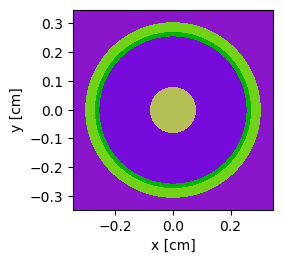

In [75]:
root_universe.plot()

The final step is to assign the cells we created to a universe and tell OpenMC that this universe is the "root" universe in our geometry. The `Geometry` is the final object that is actually exported to XML.

In [76]:
geometry = openmc.Geometry(root=root_universe)

In [77]:
geometry.export_to_xml()

# Starting source and settings

The Python API has a module `openmc.stats` with various univariate and multivariate probability distributions. We can use these distributions to create a starting source using the `openmc.Source` object. One can independently specify the spatial distribution (`space`), the angular distribution (`angle`), the energy distribution (`energy`), and the time distribution (`time`). For this example, we'll only specify the spatial distribution as a single point.

In [78]:
space = openmc.stats.Point((0.0, 0.1, 0.0))
source = openmc.IndependentSource(space=space)

Now let's create a `Settings` object and give it the source we created along with specifying how many batches and particles we want to run.

In [79]:
settings = openmc.Settings()

In [80]:
settings.source = source
settings.batches = 50
settings.inactive = 10
settings.particles = 1000

settings.export_to_xml()

---

## Temperature Treatment

Generally, cross section data in OpenMC is specified at specific temperature values. Material or cell temperatures between these values can be used, however. OpenMC can model the temperature using a few different techniques:

  - **nearest**: OpenMC will use the nearest temperature cross section data available within some tolerance
  - **interpolate**: OpenMC will interpolate between the two nearest temperatures

[temperature treatment documentation](https://ec2-44-193-2-67.compute-1.amazonaws.com/)

For the CEFR model, we'll treat all of our materials as if they were at 523.15 K.

In [81]:
for m in materials:
    m.temperature = 523.15 # Kelvin
    
settings.temperature['method'] = 'nearest'
settings.temperature['tolerance'] = 100.0 # K 

In [82]:
print(materials[0])

Material
	ID             =	2
	Name           =	fuel
	Temperature    =	523.15
	Density        =	0.07021 [atom/b-cm]
	Volume         =	None [cm^3]
	Depletable     =	True
	S(a,b) Tables  
	Nuclides       
	U235           =	0.0149       [ao]
	U238           =	0.0826       [ao]
	O16            =	0.00469      [ao]



In [83]:
settings.export_to_xml()
materials.export_to_xml()

---

# Running OpenMC

Running OpenMC from Python can be done using the `openmc.run()` function. This function allows you to set the number of MPI processes and OpenMP threads, if need be.

In [84]:
openmc.run()

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

Great! OpenMC already told us our k-effective.

# Geometry plotting

We saw before that we could call the `Universe.plot()` method to show a universe while we were creating our geometry. There is also a built-in plotter in the codebase that is much faster than the Python plotter and has more options. The interface looks somewhat similar to the `Universe.plot()` method. Instead though, we create `Plot` instances, assign them to a `Plots` collection, export it to XML, and then run OpenMC in geometry plotting mode. As an example, let's specify that we want the plot to be colored by material (rather than by cell) and we assign yellow to fuel and blue to water.

With our plot created, we need to add it to a `Plots` collection which can be exported to XML.

Now, we can use functionality from IPython to display the `.png` image inline in our notebook:

OpenMC also provides us with a method on the `Plot` class that simplifies the workflow.

# The `Model` class

So far, we've seen that to create and simulate a model, we had to create an instance of `Geometry`, `Materials`, and `Settings` and call the `export_to_xml` method on each of them. OpenMC also provides a `Model` class that aggregates these classes together an provides a single `export_to_xml` method that will export all files.

In [85]:
model = openmc.Model()
model.settings = settings
model.geometry = geometry
model.materials = materials

In [86]:
statepoint_file = model.run()

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

In [87]:
statepoint_file

PosixPath('/home/efra/Documents/openmc/openmc_first_tutorial/statepoint.50.h5')

The `Model` class also has `run` method that will both export single XML file (`model.xml`) *and* run a simulation, returning the name of the last statepoint file that was written:

<div class="alert alert-block alert-info">
Note: If both separate XML inputs (`materials.xml`, `geometry.xml`, `settings.xml`, ...) and a `model.xml` file are both present in OpenMC's run directory, the `model.xml` fill will be used instead of the separate XML inputs.    
</div>

As we'll see later, the `Model` class has other useful features and can be very useful for postprocessing work.

---

# Basic Tallies in OpenMC

**Learning Objectives:**

  - Understand application of filters and scores to create tallies
  - Apply tallies to an OpenMC simulation
  - Extract information from OpenMC statepoint files
  - Understand tally units and normalization
  - Plot tally results

In this section, we'll be looking at how to extract custom information from an OpenMC simulation in what is known as a tally. A tally accumulates statistical information during the simulation about particles when they eneter regions of phase space specified on the tally. The limits of these regions are set by filters applied to the tally. Scores and nuclides can also be applied to tallies to indicate what type of information is kept about the particle (e.g. reaction types, flux, heat, etc.).

Any tally in OpenMC can be described with the following form:

$$ 
 X = \underbrace{\int d\mathbf{r} \int d\mathbf{\Omega} \int
    dE}_{\text{filters}} \underbrace{f(\mathbf{r}, \mathbf{\Omega},
    E)}_{\text{scores}} \psi (\mathbf{r}, \mathbf{\Omega}, E)
$$

where filters set the limits of the integrals and the scoring function is convolved with particle information (e.g. reaction type, current material, etc.).

First, we'll import a few additional packages to help manage data and visualize results.

In [88]:
import numpy as np
from matplotlib import pyplot as plt

In [89]:
model.geometry.root_universe

Universe
	ID             =	2
	Name           =	
	Geom           =	CSG
	Cells          =	[4, 5, 6, 7, 8]

In [90]:
model.geometry.get_all_materials()

{4: Material
 	ID             =	4
 	Name           =	helium
 	Temperature    =	523.15
 	Density        =	None [sum]
 	Volume         =	None [cm^3]
 	Depletable     =	False
 	S(a,b) Tables  
 	Nuclides       
 	He3            =	1.9999999999999998e-17 [ao]
 	He4            =	9.999979999999999e-12 [ao],
 2: Material
 	ID             =	2
 	Name           =	fuel
 	Temperature    =	523.15
 	Density        =	0.07021 [atom/b-cm]
 	Volume         =	None [cm^3]
 	Depletable     =	True
 	S(a,b) Tables  
 	Nuclides       
 	U235           =	0.0149       [ao]
 	U238           =	0.0826       [ao]
 	O16            =	0.00469      [ao],
 3: Material
 	ID             =	3
 	Name           =	steel
 	Temperature    =	523.15
 	Density        =	0.0049 [atom/b-cm]
 	Volume         =	None [cm^3]
 	Depletable     =	False
 	S(a,b) Tables  
 	Nuclides       
 	Fe54           =	0.05815775   [ao]
 	Fe56           =	0.9129523    [ao]
 	Fe57           =	0.02108405   [ao]
 	Fe58           =	0.0028059    [ao]
 	C12    

<Axes: xlabel='x [cm]', ylabel='y [cm]'>

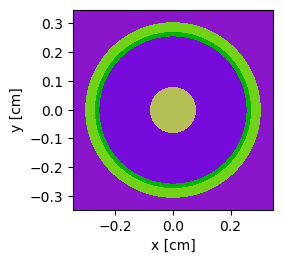

In [91]:
model.geometry.root_universe.plot()

We'll continue to work with the CEFR pincell model we've developed thus far. Let's explore that model further.

In this exercise we'll be adding tallies to perform a few different tasks:


  **1. Determine the energy and heat produced per fission** \
  **2. Plot the flux spectrum of the pincell** \
  **3. Plot reaction types based on material**
  
To do this we'll use a variety of different filters applied to different tallies. 

First, to determine the recoverable energy produced per fission we'll create a tally without filters to gather information on the fission reaction rate ("`fission`") and recoverable fission energy ("`kappa-fission`"). Because we want this information talllied throughout the model, a "global" tally, no filters need to be applied.



<div class="alert alert-block alert-info">
A full list of scores and their meanings can be found <a href=https://docs.openmc.org/en/stable/usersguide/tallies.html#scores >here</a>.
</div>

## Task 1: Energy released per fission

## [Link to tally score descriptions](https://docs.openmc.org/en/stable/usersguide/tallies.html#scores)

In [92]:
tally = openmc.Tally()
print(tally)

Tally
	ID             =	1
	Name           =	
	Filters        =	
	Nuclides       =	
	Scores         =	[]
	Estimator      =	None
	Multiply dens. =	True


In [93]:
tally.scores = ['fission', 'kappa-fission']
print(tally)

Tally
	ID             =	1
	Name           =	
	Filters        =	
	Nuclides       =	
	Scores         =	['fission', 'kappa-fission']
	Estimator      =	None
	Multiply dens. =	True


Similar to the `openmc.Materials` object, the `openmc.Tallies` object is a sub-class of Python's built-in `list` and is used to collect tallies for appliction to the model.

In [94]:
model.tallies = openmc.Tallies([tally])

In [95]:
statepoint_file = model.run()

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

If we list our current directory, we see that several new files have been created as a result of this run: `summary.h5`, `tallies.out`, and `statepoint.50.h5`. The summary file contains information about the simulation's setup (geometry, materials, meshes, etc.) in an HDF5 format. The `tallies.out` file contains a text output of all user-specified tallies for the simulation.

In [96]:
!cat tallies.out

 ============================>     TALLY 1     <============================

 Total Material
   Fission Rate                         0.584751 +/- 0.00284221
   Kappa-Fission Rate                   1.13485e+08 +/- 551009


This can be useful to quickly look at simple tally results, but isn't a great format to post-process simulation data. For that we'll look to the statepoint file.

In [97]:
sp = openmc.StatePoint(statepoint_file)
# extract tally information
sp.close()

In [98]:
help(openmc.StatePoint.get_tally)

Help on function get_tally in module openmc.statepoint:

get_tally(self, scores=[], filters=[], nuclides=[], name=None, id=None, estimator=None, exact_filters=False, exact_nuclides=False, exact_scores=False)
    Finds and returns a Tally object with certain properties.

    This routine searches the list of Tallies and returns the first Tally
    found which satisfies all of the input parameters.

    NOTE: If any of the "exact" parameters are False (default), the input
    parameters do not need to match the complete Tally specification and
    may only represent a subset of the Tally's properties. If an "exact"
    parameter is True then number of scores, filters, or nuclides in the
    parameters must precisely match those of any matching Tally.

    Parameters
    ----------
    scores : list, optional
        A list of one or more score strings (default is []).
    filters : list, optional
        A list of Filter objects (default is []).
    nuclides : list, optional
        A li

In [99]:
with openmc.StatePoint(statepoint_file) as sp:
    tally_by_scores = sp.get_tally(scores=['fission', 'kappa-fission'])
    tally_by_id = sp.get_tally(id=tally.id)

In [100]:
print(tally_by_scores)

Tally
	ID             =	1
	Name           =	
	Filters        =	
	Nuclides       =	total
	Scores         =	['fission', 'kappa-fission']
	Estimator      =	tracklength
	Multiply dens. =	True


In [101]:
print(tally_by_id)

Tally
	ID             =	1
	Name           =	
	Filters        =	
	Nuclides       =	total
	Scores         =	['fission', 'kappa-fission']
	Estimator      =	tracklength
	Multiply dens. =	True


To extract information from the statepoint file we'll create an `openmc.StatePoint` object. The `statepoint.get_tally` function will search for tallies by scores, filters, nuclides, ids, and return the closest match. Exact matches can be speficied as well.

In [102]:
tally_by_id.mean

array([[[5.84750507e-01, 1.13484644e+08]]])

If we print the tally objects returned, we see that they indeed match the tally specification we generated above.

In [103]:
# sp = openmc.StatePoint(statepoint_file)
# sp.close()

<div class="alert alert-block alert-info">
<b>A quick aside on how statepoint objects interact with summary files:</b>


The `openmc.statepoint` object will read information from the `summary.h5` file if one is present, keeping that file open in the Python interpreter. The open `summary.h5` file can interfere with the initialization of subsequent OpenMC simulations. It is recommended that information be extracted from statepoints within a [context manager](https://book.pythontips.com/en/latest/context_managers.html) as we do here. Alternatively, making sure to call the `openmc.StatePoint.close` method will work also. For more details please look to the [relevant section in the user's guide](https://docs.openmc.org/en/stable/usersguide/troubleshoot.html#runtimeerror-failed-to-open-hdf5-file-with-mode-w-summary-h5).   
</div>



To compute the energy released per fission event, we can simply take the tallied energy released per fission and divide it by the fission rate.

The array of results returned from the `Tally.get_values` method returns an array with 3 dimensions: one for filter bins, one for nuclides, and one for the scores requested.

In [104]:
help(openmc.Tally.get_values)

Help on function get_values in module openmc.tallies:

get_values(self, scores=[], filters=[], filter_bins=[], nuclides=[], value='mean')
    Returns one or more tallied values given a list of scores, filters,
    filter bins and nuclides.

    This method constructs a 3D NumPy array for the requested Tally data
    indexed by filter bin, nuclide bin, and score index. The method will
    order the data in the array as specified in the parameter lists.

    Parameters
    ----------
    scores : list of str
        A list of one or more score strings
        (e.g., ['absorption', 'nu-fission']; default is [])
    filters : Iterable of openmc.FilterMeta
        An iterable of filter types
        (e.g., [MeshFilter, EnergyFilter]; default is [])
    filter_bins : list of Iterables
        A list of tuples of filter bins corresponding to the filter_types
        parameter (e.g., [(1,), ((0., 0.625e-6),)]; default is []). Each
        tuple contains bins for the corresponding filter type i

In [105]:
fission_rate = tally_by_id.get_values(scores=['fission']).flatten()[0]
kappa_fission = tally_by_id.get_values(scores=['kappa-fission']).flatten()[0]

In [106]:
print(f'Fission rate: {fission_rate} [fission per src-particle]')
print(f'Kappa-fission: {kappa_fission} [eV per src-particle]')
mev_per_fission = 1E-06 * kappa_fission / fission_rate
print(f'MeV per fission: {mev_per_fission}')

Fission rate: 0.5847505065395343 [fission per src-particle]
Kappa-fission: 113484644.10667065 [eV per src-particle]
MeV per fission: 194.07361402430539


For a water reactor with U235 as the only fissioning isotope this is about what we would expect: ~193-194 MeV! Okay, on to some new tallies with filters.

As with most values coming out of an MC code, the tally values in the statepoint file are per source-particle. In this case, these units cancel out, but this will not be the case in our next example.

---

## Task 2: Plot the neutron flux spectrum


To perform this task, we'll be applying a tally with an energy filter and a score. OpenMC's data module contains different group structures. For this problem we'll use the CASMO-70 group structure. An energy filter can easily be created from a pre-defined group structure in OpenMC as follows:

In [107]:
openmc.mgxs.GROUP_STRUCTURES.keys()

dict_keys(['CASMO-2', 'CASMO-4', 'CASMO-8', 'CASMO-16', 'CASMO-25', 'CASMO-40', 'VITAMIN-J-42', 'SCALE-44', 'MPACT-51', 'MPACT-60', 'MPACT-69', 'CASMO-70', 'XMAS-172', 'VITAMIN-J-175', 'SCALE-252', 'TRIPOLI-315', 'SHEM-361', 'CCFE-709', 'UKAEA-1102', 'ECCO-1968'])

In [108]:
casmo_70 = openmc.mgxs.GROUP_STRUCTURES['CASMO-70']

In [109]:
energy_filter = openmc.EnergyFilter(casmo_70)

In [110]:
print(len(energy_filter.bins))

70


In [111]:
flux_tally = openmc.Tally()
flux_tally.filters = [energy_filter]
flux_tally.scores = ['flux']
print(flux_tally)

Tally
	ID             =	2
	Name           =	
	Filters        =	EnergyFilter
	Nuclides       =	
	Scores         =	['flux']
	Estimator      =	None
	Multiply dens. =	True


Now we'll apply this tally and re-run the problem

In [112]:
model.tallies = openmc.Tallies([flux_tally])
statepoint_file = model.run()

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

 Reading U238 from
 /home/efra/simulations/openmc/data/endfb-viii.0-hdf5/neutron/U238.h5
 Reading O16 from
 /home/efra/simulations/openmc/data/endfb-viii.0-hdf5/neutron/O16.h5
 Reading Fe54 from
 /home/efra/simulations/openmc/data/endfb-viii.0-hdf5/neutron/Fe54.h5
 Reading Fe56 from
 /home/efra/simulations/openmc/data/endfb-viii.0-hdf5/neutron/Fe56.h5
 Reading Fe57 from
 /home/efra/simulations/openmc/data/endfb-viii.0-hdf5/neutron/Fe57.h5
 Reading Fe58 from
 /home/efra/simulations/openmc/data/endfb-viii.0-hdf5/neutron/Fe58.h5
 Reading C12 from
 /home/efra/simulations/openmc/data/endfb-viii.0-hdf5/neutron/C12.h5
 Reading C13 from
 /home/efra/simulations/openmc/data/endfb-viii.0-hdf5/neutron/C13.h5
 Reading He3 from
 /home/efra/simulations/openmc/data/endfb-viii.0-hdf5/neutron/He3.h5
 Reading He4 from
 /home/efra/simulations/openmc/data/endfb-viii.0-hdf5/neutron/He4.h5
 Reading Na23 from
 /home/efra/simulations/openmc/data/endfb-viii.0-hdf5/neutron/Na23.h5
 Minimum neutron data temperatu

In [113]:
temp_energy_filter = openmc.EnergyFilter([0.0, 0.01, 20E6])
print(temp_energy_filter.bins)

[[0.e+00 1.e-02]
 [1.e-02 2.e+07]]


Now to plot the spectrum

In [115]:
with openmc.StatePoint(statepoint_file) as sp:
    spectrum_tally = sp.get_tally(id=flux_tally.id)

In [116]:
flux_spectrum = spectrum_tally.mean
print(flux_spectrum.size)

70


In [120]:
type(flux_spectrum)

numpy.ndarray

In [121]:
np.savetxt('fast_flux_spectrum.txt', flux_spectrum.flatten())

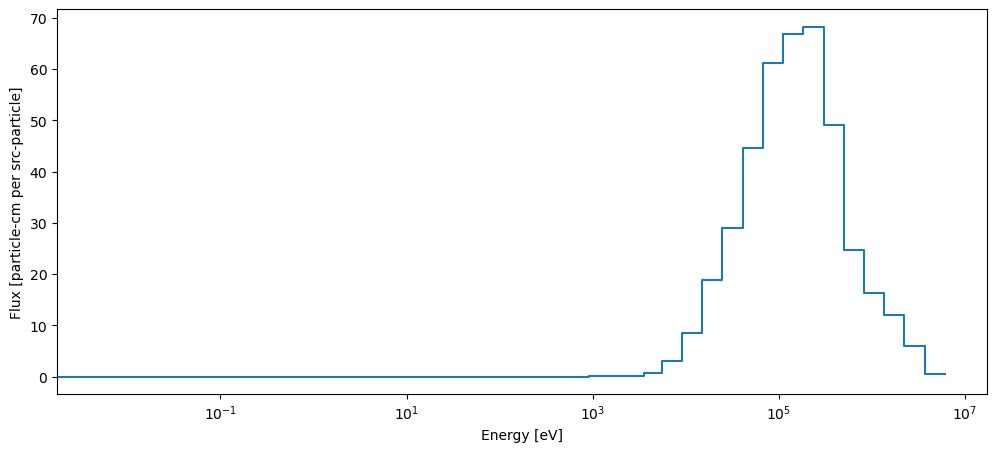

In [119]:
fig = plt.figure(figsize=(12, 5))

bin_boundaries = energy_filter.lethargy_bin_width

plt.step(np.unique(energy_filter.bins)[:-1], flux_spectrum.flatten() / bin_boundaries)
plt.xscale('log')
plt.xlabel('Energy [eV]')
plt.ylabel('Flux [particle-cm per src-particle]')
plt.show()

## Normalizing Tallies

Note that the units of flux in the above plot are in $\frac{particle-cm}{source-particle}$. As is the case with many values tallied by Monte Carlo codes, the value of the flux does not account for volume and is in terms of the number of source particles emitted. To generate this same plot in terms of absolute flux units ($\frac{particle}{cm^{2}-s}$) we'll need to normalize this tally by:

  - the volume of the region the tally covers
  - the number of source particle emitted

In this case, the volume of the region is the volume of the entire pincell. Because we're working with a 2-D model, we'll get units that give us the flux per unit length of the pincell in the axial direction. For simplicity, we'll assume that our pincell is 1 cm in height to make life easier. OpenMC's geometry object allows for computation of a bounding box for geometries like this that will help make this more straight forward.

In [122]:
volume = pitch * pitch
print(volume)

0.4830249999999999


In [123]:
model.geometry.bounding_box

BoundingBox(lower_left=(-0.3475, -0.3475, -inf), upper_right=(0.3475, 0.3475, inf))

Determining the number of source particles per second is more complicated, however. This means computing the eV/source particle due to fission. To get the source rate, we'll need the following pieces of information:

  1. the total power produced in the tally region (known a priori)
  2. the heat produced by fission power, per source particle
  
 To get this information we'll need to construct another tally to get additional information from the simulation.

In [124]:
pincell_power = 65E6 / 79 /61 / 80 # [W/cm]
pincell_power_in_ev = pincell_power / 1.6E-19
ev_per_fission = kappa_fission / fission_rate

neutron_source = pincell_power_in_ev / ev_per_fission / 1.47843
print(f'Neutron source: {neutron_source} [src-p per s]')

Neutron source: 3672647110436.797 [src-p per s]


The combination of the following tally values and power provide us with the source normalization needed as follows:


$$ \text{neutron source} [\frac{n}{s}] = \frac{1}{\text{heat per fission} [\frac{eV}{source}]} [\frac{source}{eV}]\times \frac{1}{1.6\times 10^{-19}} [\frac{eV}{J}] \times \text{power} [\frac{J}{s}]$$ 

/home/efra/anaconda3/envs/openmc-env/lib/python3.12/site-packages/openmc/filter.py:1387: RuntimeWarning: divide by zero encountered in divide
  return np.log10(self.bins[:, 1]/self.bins[:, 0])


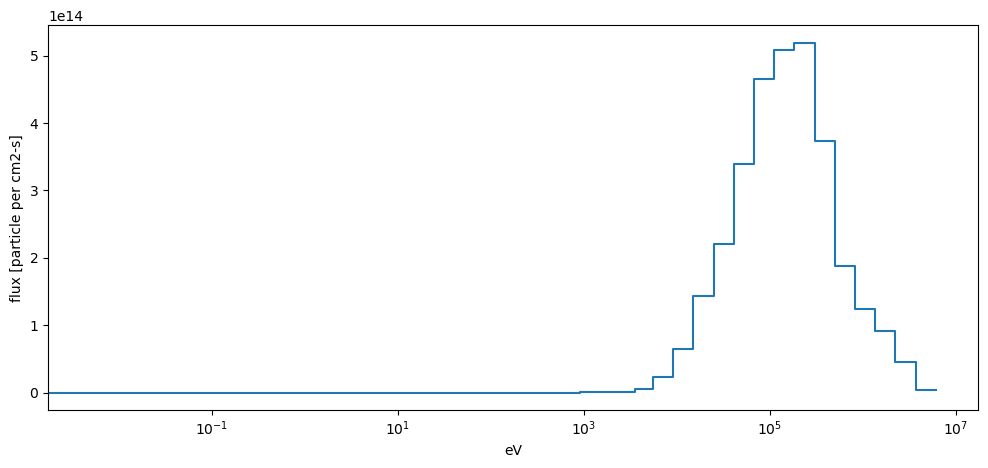

In [125]:
fig = plt.figure(figsize=(12, 5))

bin_boundaries = energy_filter.lethargy_bin_width

normalized_flux_spectrum = neutron_source * flux_spectrum.flatten() / volume

plt.step(np.unique(energy_filter.bins)[:-1], normalized_flux_spectrum / bin_boundaries)
plt.xscale('log')
plt.xlabel('eV')
plt.ylabel('flux [particle per cm2-s]')
plt.show()

We can now use this information to normalize our flux values and reproduce our plot in more standard units.

---

## Task 3: Reaction Types by Material

Looking at the different reaction types by material will require a material filter and the set of reaction types we want to score. For this example, we'll be scoring absorption, scattering and fission in each material.

To start, we'll create a material filter.

In [126]:
model.materials

[Material
 	ID             =	2
 	Name           =	fuel
 	Temperature    =	523.15
 	Density        =	0.07021 [atom/b-cm]
 	Volume         =	None [cm^3]
 	Depletable     =	True
 	S(a,b) Tables  
 	Nuclides       
 	U235           =	0.0149       [ao]
 	U238           =	0.0826       [ao]
 	O16            =	0.00469      [ao],
 Material
 	ID             =	3
 	Name           =	steel
 	Temperature    =	523.15
 	Density        =	0.0049 [atom/b-cm]
 	Volume         =	None [cm^3]
 	Depletable     =	False
 	S(a,b) Tables  
 	Nuclides       
 	Fe54           =	0.05815775   [ao]
 	Fe56           =	0.9129523    [ao]
 	Fe57           =	0.02108405   [ao]
 	Fe58           =	0.0028059    [ao]
 	C12            =	0.00494461   [ao]
 	C13            =	5.5389999999999997e-05 [ao],
 Material
 	ID             =	4
 	Name           =	helium
 	Temperature    =	523.15
 	Density        =	None [sum]
 	Volume         =	None [cm^3]
 	Depletable     =	False
 	S(a,b) Tables  
 	Nuclides       
 	He3            =	1.999999

Now we'll gather information from the statepoint file about each score we applied to the tally. With multiple scores and materials, we'll use a Pandas data frame to view the results in a more coherent manner.

In [127]:
material_filter = openmc.MaterialFilter(model.materials)

In [128]:
print(material_filter)

MaterialFilter
	Bins           =	[2 3 4 5]
	ID             =	3



Each score has three values -- one for each material in the model.

In [135]:
reaction_tally = openmc.Tally()
reaction_tally.scores = ['fission', 'absorption', 'scatter']
reaction_tally.filters = [material_filter]

In [136]:
print(reaction_tally)

Tally
	ID             =	6
	Name           =	
	Filters        =	MaterialFilter
	Nuclides       =	
	Scores         =	['fission', 'absorption', 'scatter']
	Estimator      =	None
	Multiply dens. =	True


In [137]:
model.tallies = openmc.Tallies([reaction_tally])

In [138]:
statepoint_file = model.run()

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

In [139]:
with openmc.StatePoint(statepoint_file) as sp:
    reaction_tally_out = sp.get_tally(id=reaction_tally.id)

In [140]:
print(reaction_tally_out)

Tally
	ID             =	6
	Name           =	
	Filters        =	MaterialFilter
	Nuclides       =	total
	Scores         =	['fission', 'absorption', 'scatter']
	Estimator      =	tracklength
	Multiply dens. =	True


In [141]:
df = reaction_tally_out.get_pandas_dataframe()

In [142]:
df 

,material,nuclide,score,mean,std. dev.
0,2,total,fission,5.847505e-01,2.842214e-03
1,2,total,absorption,1.001163e+00,5.713473e-03
2,2,total,scatter,2.255117e+01,1.158613e-01
3,3,total,fission,0.000000e+00,0.000000e+00
4,3,total,absorption,4.176829e-04,4.335544e-06
5,3,total,scatter,2.349071e-01,1.482899e-03
6,4,total,fission,0.000000e+00,0.000000e+00
7,4,total,absorption,2.616341e-16,1.913695e-18
8,4,total,scatter,1.394756e-10,5.507506e-13
9,5,total,fission,0.000000e+00,0.000000e+00


In [143]:
df['normalized-mean'] = df['mean'] * neutron_source

In [144]:
df

,material,nuclide,score,mean,std. dev.,normalized-mean
0,2,total,fission,5.847505e-01,2.842214e-03,2.147582e+12
1,2,total,absorption,1.001163e+00,5.713473e-03,3.676918e+12
2,2,total,scatter,2.255117e+01,1.158613e-01,8.282247e+13
3,3,total,fission,0.000000e+00,0.000000e+00,0.000000e+00
4,3,total,absorption,4.176829e-04,4.335544e-06,1.534002e+09
5,3,total,scatter,2.349071e-01,1.482899e-03,8.627307e+11
6,4,total,fission,0.000000e+00,0.000000e+00,0.000000e+00
7,4,total,absorption,2.616341e-16,1.913695e-18,9.608899e-04
8,4,total,scatter,1.394756e-10,5.507506e-13,5.122445e+02
9,5,total,fission,0.000000e+00,0.000000e+00,0.000000e+00


In [147]:
fission_df = df[df['score'] == 'fission']

In [148]:
fission_df

,material,nuclide,score,mean,std. dev.,normalized-mean
0,2,total,fission,0.584751,0.002842,2.147582e+12
3,3,total,fission,0.000000,0.000000,0.000000e+00
6,4,total,fission,0.000000,0.000000,0.000000e+00
9,5,total,fission,0.000000,0.000000,0.000000e+00


<Axes: xlabel='material'>

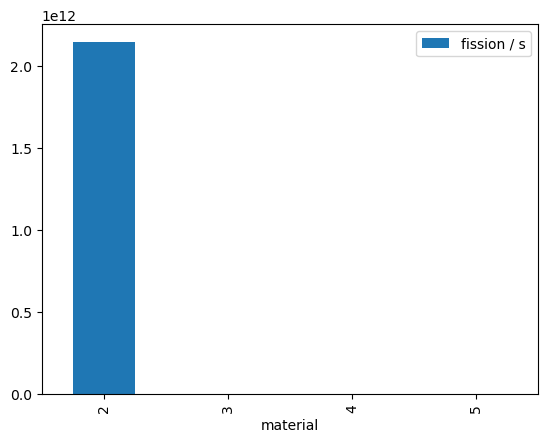

In [149]:
fission_df.plot('material', 'normalized-mean', kind='bar', label='fission / s')

In [150]:
scatter_df = df[df['score'] == 'scatter']

<Axes: xlabel='material'>

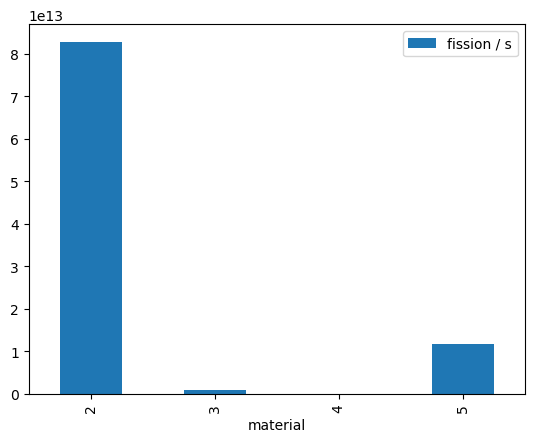

In [151]:
scatter_df.plot('material', 'normalized-mean', kind='bar', label='fission / s')

First, we'll add a new column to the data frame with normalized results.

We'll add a new entry in the dataframe for our material names to make plotting easier.

---

# Universes

A universe is a collection of cells that can be used as a repeatable unit in the geometry. At a minimum, there must be one "root" universe (say, named `root`), which gets passed to `openmc.Geometry(root)`. But you can also use universes to repeat a collection of cells multiple times throughout a geometry. Here, we will explore some basic features of universes.

We'll start by making a universe which looks similar to the pincell we built earlier - say, a cylinder of UO2 enclosed by an infinite region of water. First, we set up our materials and create our geometry.

First, let's make a simplified pincell model to explore how universes work.

In [152]:
outer_surface = openmc.ZCylinder(r=1.0)
inside_cyl = -outer_surface

pincell = openmc.Cell(region=inside_cyl, fill=uo2)
outside = openmc.Cell(region=+outer_surface, fill=sodium)

In [153]:
temp_universe = openmc.Universe()
temp_universe.add_cells([pincell, outside])

<Axes: xlabel='x [cm]', ylabel='y [cm]'>

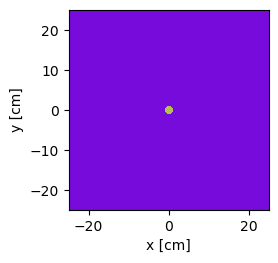

In [156]:
temp_universe.plot(width=(50.0, 50.0))

In [157]:
big_cylinder = openmc.ZCylinder(r=5.0)
big_cell = openmc.Cell(region= -big_cylinder)
big_cell.fill = temp_universe

In [158]:
big_universe = openmc.Universe()
big_universe.add_cell(big_cell)

<Axes: xlabel='x [cm]', ylabel='y [cm]'>

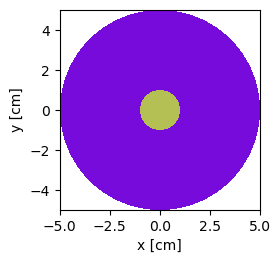

In [159]:
big_universe.plot()

In [160]:
outer_surface.x0 = 2.5
outer_surface.y0 = 0.5

<Axes: xlabel='x [cm]', ylabel='y [cm]'>

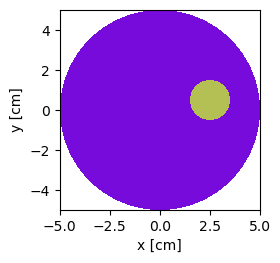

In [161]:
big_universe.plot()

In [168]:
big_cell.translation = [0, 0, 0]

<Axes: xlabel='x [cm]', ylabel='y [cm]'>

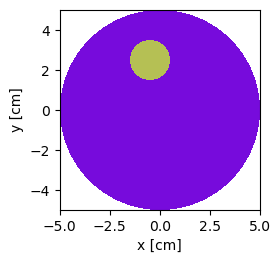

In [169]:
big_universe.plot()

In [170]:
big_cell.rotation = [0, 0, 90]

<Axes: xlabel='x [cm]', ylabel='y [cm]'>

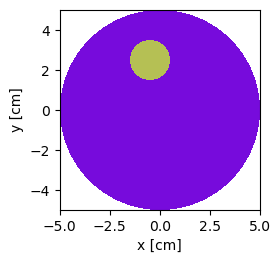

In [171]:
big_universe.plot()

We have created a universe containing a pin, enclosed in an infinite medium of water. Now let's suppose that I want to fill this universe into an enclosing cell, a cylinder of radius 5 cm. Let's first create this cylinder, and then we will fill it with our `universe`.

Let's take a look at our geometry. In order to visualize at this stage, we need to create a universe from our `big_cell`.

We can see that our `big_cell`, the large cylinder, has been filled with the `universe` we declared earlier. Let's increase the complexity a bit to understand how this filling works. What if the cylinder of UO2 in our `universe` is not located at the origin, but is instead shifted to a different position?

We see that when we fill a universe inside of another cell, that there's (by default) no transformation of coordinates. You can shift the position of the universe filling a cell with the `Cell.translation` attribute. There are similar adjustments you can make, like rotations.

# Lattices

Lattices are a convenient way to (i) repeat a universe multiple times in space, while (ii) automatically translating that universe's origin to different positions in space.

In this exercise, we'll build two lattices, one rectangular and one hexagonal, using the CEFR pincell.

Later in this example, we will make a bunch of geometry plots.  By default, every region is colored randomly and the results are Now that we know our materials, let's define a "color specification" to use when plotting our geometry.

In [172]:
mat_colors = {
    uo2 : 'red',
    steel : 'grey',
    he4 : (249, 249, 249),
    sodium : 'lightblue'
}

### An alternative approach to building a pincell universe

Initally, we built the CEFR pincell model by specifying each surface manually. There are many convenience functions in OpenMC that make this process even easier.

In [173]:
pin_radii = [0.08020, 0.25565, 0.27112, 0.30499]
pin_surfaces = [openmc.ZCylinder(r=radius) for radius in pin_radii]

---

In [174]:
print(pin_surfaces)

[Surface
	ID                 =	13
	Name               =	
	Type               =	z-cylinder
	Boundary           =	transmission
	Coefficients       
x0                  =	0.0
y0                  =	0.0
r                   =	0.0802
, Surface
	ID                 =	14
	Name               =	
	Type               =	z-cylinder
	Boundary           =	transmission
	Coefficients       
x0                  =	0.0
y0                  =	0.0
r                   =	0.25565
, Surface
	ID                 =	15
	Name               =	
	Type               =	z-cylinder
	Boundary           =	transmission
	Coefficients       
x0                  =	0.0
y0                  =	0.0
r                   =	0.27112
, Surface
	ID                 =	16
	Name               =	
	Type               =	z-cylinder
	Boundary           =	transmission
	Coefficients       
x0                  =	0.0
y0                  =	0.0
r                   =	0.30499
]


In [175]:
pin_materials = [he4, uo2, he4, steel, sodium]

In [176]:
help(openmc.model.pin)

Help on function pin in module openmc.model.funcs:

pin(surfaces, items, subdivisions=None, divide_vols=True, **kwargs)
    Convenience function for building a fuel pin

    Parameters
    ----------
    surfaces : iterable of :class:`openmc.Cylinder`
        Cylinders used to define boundaries
        between items. All cylinders must be
        concentric and of the same orientation, e.g.
        all :class:`openmc.ZCylinder`
    items : iterable
        Objects to go between ``surfaces``. These can be anything
        that can fill a :class:`openmc.Cell`, including
        :class:`openmc.Material`, or other :class:`openmc.Universe`
        objects. There must be one more item than surfaces,
        which will span all space outside the final ring.
    subdivisions : None or dict of int to int
        Dictionary describing which rings to subdivide and how
        many times. Keys are indexes of the annular rings
        to be divided. Will construct equal area rings
    divide_vols :

In [177]:
pin_universe = openmc.model.pin(pin_surfaces, pin_materials)

<Axes: xlabel='x [cm]', ylabel='y [cm]'>

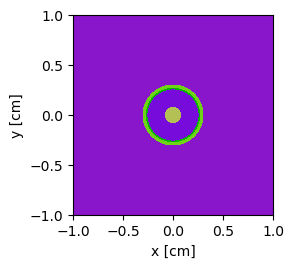

In [179]:
pin_universe.plot(width=(2.0, 2.0))

In [185]:
cell_list = list(pin_universe.cells.values())
print(cell_list)

[Cell
	ID             =	12
	Name           =	
	Fill           =	Material 4
	Region         =	-13
	Rotation       =	None
	Temperature    =	None
	Translation    =	None
	Volume         =	None
, Cell
	ID             =	13
	Name           =	
	Fill           =	Material 2
	Region         =	(13 -14)
	Rotation       =	None
	Temperature    =	None
	Translation    =	None
	Volume         =	None
, Cell
	ID             =	14
	Name           =	
	Fill           =	Material 4
	Region         =	(14 -15)
	Rotation       =	None
	Temperature    =	None
	Translation    =	None
	Volume         =	None
, Cell
	ID             =	15
	Name           =	
	Fill           =	Material 3
	Region         =	(15 -16)
	Rotation       =	None
	Temperature    =	None
	Translation    =	None
	Volume         =	None
, Cell
	ID             =	16
	Name           =	
	Fill           =	Material 5
	Region         =	16
	Rotation       =	None
	Temperature    =	None
	Translation    =	None
	Volume         =	None
]


In [186]:
fuel_cell = list(pin_universe.cells.values())[1]
print(fuel_cell)

Cell
	ID             =	13
	Name           =	
	Fill           =	Material 2
	Region         =	(13 -14)
	Rotation       =	None
	Temperature    =	None
	Translation    =	None
	Volume         =	None



## Lattices in OpenMC

OpenMC has `RectLattice` and `HexLattice` objects.  For our fuel assembly, we need to use `RectLattice`. Let's look at a simple one before we do the full assembly.

First, we also need to define a universe that is all water.

In [182]:
helium_cell = openmc.Cell(fill=he4)
inf_helium = openmc.Universe(cells=[helium_cell])

When creating a rectangular lattice, we need to define:

1. The lower-left coordinates of the lattice (`.lower_left`)
2. The size of each lattice element (`.pitch`)
3. The 2D arrangement of universes (`.universes`)
4. (_optionally_) A universe that is used outside of the defined region (`.outer`)

## Rectangular Lattices

In [187]:
lattice = openmc.RectLattice()

pitch = 0.8
lattice.lower_left = (0.0, 0.0)
lattice.pitch = (pitch, pitch)

lattice.universes = [
    [pin_universe, inf_helium],
    [inf_helium, pin_universe]
]

In [188]:
example_cell = openmc.Cell(fill=lattice)
example_univ = openmc.Universe(cells=[example_cell])

<Axes: xlabel='x [cm]', ylabel='y [cm]'>

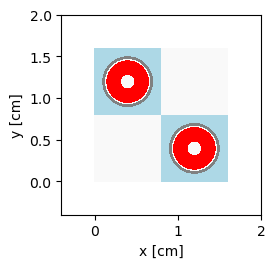

In [189]:
plot_args = {
    'width': (3*pitch, 3*pitch),
    'origin': (pitch, pitch, 0),
    'color_by': 'material',
    'colors': mat_colors
}
example_univ.plot(**plot_args)

To plot the lattice, we need to put it in a universe. For this, we'll create a single cell filled with the lattice, and then put that single cell inside a universe to plot:

In [190]:
helium_cell.fill = sodium
lattice.outer = inf_helium

**What exactly does `outer` mean?**

In the previous section, we set the lattice outer universe to a universe containing a single cell with only water in it. To get a better sense of what the outer universe does, let's change the outer universe to the guide tube universe:

## Hexagonal Lattices

OpenMC also allows you to define hexagonal lattices. They are a little trickier, but as we'll see there are some helper methods that demystify how to assign universes.

In [191]:
hexlattice = openmc.HexLattice()

We need to set the `center` of the lattice, the `pitch`, an `outer` universe (which is applied to all lattice elements outside of those that are defined), and a list of `universes`. Let's start with the easy ones first. Note that for a 2D lattice, we only need to specify a single number for the pitch.

In [224]:
hexlattice.center = (0.0, 0.0)
hexlattice.pitch = [0.695]

inf_sodium_cell = openmc.Cell(fill=sodium)
inf_sodium = openmc.Universe(cells=[inf_sodium_cell])
hexlattice.outer = inf_sodium

Now we need to set the `universes` property on our lattice. It needs to be set to a list of lists of Universes, where each list of Universes corresponds to a ring of the lattice. The rings are ordered from outermost to innermost, and within each ring the indexing starts at the "top". To help visualize the proper indices, we can use the `show_indices()` helper method.

In [193]:
print(hexlattice.show_indices(num_rings=3))

            (0, 0)
      (0,11)      (0, 1)
(0,10)      (1, 0)      (0, 2)
      (1, 5)      (1, 1)
(0, 9)      (2, 0)      (0, 3)
      (1, 4)      (1, 2)
(0, 8)      (1, 3)      (0, 4)
      (0, 7)      (0, 5)
            (0, 6)


Let's setup a hexagonal lattice assembly like the one in the CEFR benchmark model.

In [204]:
lat_universes = []

for ring in range(5):
    lat_universes.append(max(6*ring, 1) * [pin_universe])

In [208]:
lat_universes

[[Universe
  	ID             =	5
  	Name           =	
  	Geom           =	CSG
  	Cells          =	[12, 13, 14, 15, 16]],
 [Universe
  	ID             =	5
  	Name           =	
  	Geom           =	CSG
  	Cells          =	[12, 13, 14, 15, 16],
  Universe
  	ID             =	5
  	Name           =	
  	Geom           =	CSG
  	Cells          =	[12, 13, 14, 15, 16],
  Universe
  	ID             =	5
  	Name           =	
  	Geom           =	CSG
  	Cells          =	[12, 13, 14, 15, 16],
  Universe
  	ID             =	5
  	Name           =	
  	Geom           =	CSG
  	Cells          =	[12, 13, 14, 15, 16],
  Universe
  	ID             =	5
  	Name           =	
  	Geom           =	CSG
  	Cells          =	[12, 13, 14, 15, 16],
  Universe
  	ID             =	5
  	Name           =	
  	Geom           =	CSG
  	Cells          =	[12, 13, 14, 15, 16]],
 [Universe
  	ID             =	5
  	Name           =	
  	Geom           =	CSG
  	Cells          =	[12, 13, 14, 15, 16],
  Universe
  	ID             =	5
  	Na

In [209]:
hexlattice.universes = lat_universes[::-1]

Now let's put our lattice inside a circular cell.

In [210]:
outer_surface = openmc.ZCylinder(r=4.0, boundary_type='vacuum')
outer_cell = openmc.Cell(region=-outer_surface, fill=hexlattice)
root = openmc.Universe(cells=[outer_cell])

In [225]:
hexlattice.pitch = [0.695]

<Axes: xlabel='x [cm]', ylabel='y [cm]'>

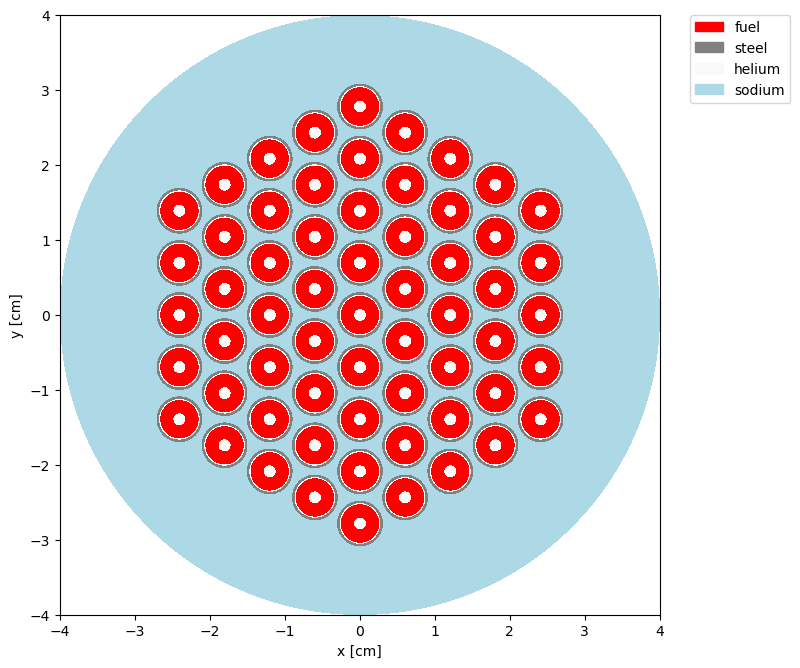

In [234]:
root.plot(width=(8.0, 8.0), pixels=(600, 600), color_by='material', colors=mat_colors, legend=True)

### Rotating the lattice

Now let's say we want our hexagonal lattice orientated such that flat sides are parallel to the y-axis instead of the x-axis. This can be achieved by changing the orientation of the lattice from `'y'` to `'x'`:

In [237]:
hexlattice.rotation = 'y'

In [238]:
hexlattice.rotation

'y'

Again, we can use the `show_indices` method to see the ordering of universes within each ring:

# Final CEFR Assembly Modeling Steps

The circular boundary is nice for some initial visualization, but in reality the CEFR assemblies are bounded by stainless steel ducts. Let's add those to the model now.

In the image of the CEFR assembly above, the steel duct is a hexagonal shape matching that of the hex lattice boundary. OpenMC has the ability to represent arbitrarily oriented planes to model this duct.

In [213]:
help(openmc.Plane)

Help on class Plane in module openmc.surface:

class Plane(PlaneMixin, Surface)
 |  Plane(a=1.0, b=0.0, c=0.0, d=0.0, *args, **kwargs)
 |
 |  An arbitrary plane of the form :math:`Ax + By + Cz = D`.
 |
 |  Parameters
 |  ----------
 |  a : float, optional
 |      The 'A' parameter for the plane. Defaults to 1.
 |  b : float, optional
 |      The 'B' parameter for the plane. Defaults to 0.
 |  c : float, optional
 |      The 'C' parameter for the plane. Defaults to 0.
 |  d : float, optional
 |      The 'D' parameter for the plane. Defaults to 0.
 |  boundary_type : {'transmission, 'vacuum', 'reflective', 'periodic', 'white'}, optional
 |      Boundary condition that defines the behavior for particles hitting the
 |      surface. Defaults to transmissive boundary condition where particles
 |      freely pass through the surface.
 |  albedo : float, optional
 |      Albedo of the surfaces as a ratio of particle weight after interaction
 |      with the surface to the initial weight. Valu

However, a hexagonal shape is a common feature in reactor design and as such there is a convenience function in OpenMC for generating a hexagonal prism region.

In [219]:
help(openmc.model.hexagonal_prism)

Help on function hexagonal_prism in module openmc.model.funcs:

hexagonal_prism(edge_length=1.0, orientation='y', origin=(0.0, 0.0), boundary_type='transmission', corner_radius=0.0)



In [240]:
inner_duct = openmc.model.hexagonal_prism(edge_length=3.281335614, orientation='y')
outer_duct = openmc.model.hexagonal_prism(edge_length=3.420465482, orientation='y')
assembly_boundary = openmc.model.hexagonal_prism(edge_length=3.536385869, orientation='y', boundary_type='reflective')

/home/efra/anaconda3/envs/openmc-env/lib/python3.12/site-packages/openmc/model/funcs.py:124: FutureWarning: The hexagonal_prism(...) function has been replaced by the HexagonalPrism(...) class. Future versions of OpenMC will not accept hexagonal_prism.
  warn("The hexagonal_prism(...) function has been replaced by the "


In [241]:
print(inner_duct)

(-36 37 -38 -39 40 41)


Now we can create the external duct and outer cells

In [242]:
lattice_cell = openmc.Cell(region=inner_duct, fill=hexlattice)

In [243]:
assembly_universe = openmc.Universe(cells=[lattice_cell]) 

In [247]:
duct_cell = openmc.Cell(region= ~inner_duct & outer_duct, fill=steel)
assembly_universe.add_cell(duct_cell)

In [249]:
outer_cell = openmc.Cell(region= ~outer_duct & assembly_boundary, fill=sodium)
assembly_universe.add_cell(outer_cell)

<Axes: xlabel='x [cm]', ylabel='y [cm]'>

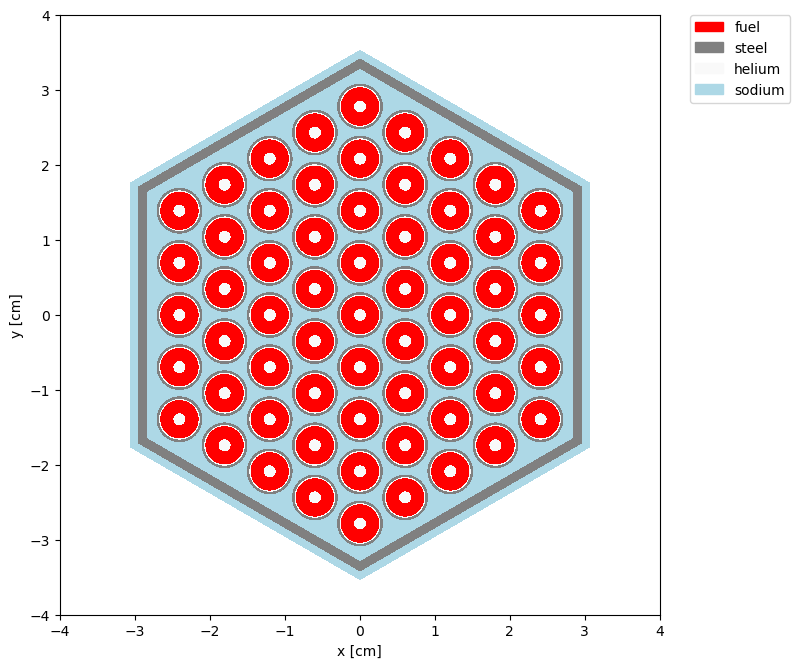

In [250]:
assembly_universe.plot(width=(8.0, 8.0), pixels=(600, 600), color_by='material', colors=mat_colors, legend=True)

In [251]:
assembly_universe.cells

{23: Cell
 	ID             =	23
 	Name           =	
 	Fill           =	9
 	Region         =	(-36 37 -38 -39 40 41)
 	Rotation       =	None
 	Translation    =	None
 	Volume         =	None,
 24: Cell
 	ID             =	24
 	Name           =	
 	Fill           =	Material 3
 	Region         =	(~(-36 37 -38 -39 40 41) (-42 43 -44 -45 46 47))
 	Rotation       =	None
 	Temperature    =	None
 	Translation    =	None
 	Volume         =	None,
 25: Cell
 	ID             =	25
 	Name           =	
 	Fill           =	Material 5
 	Region         =	(~(-42 43 -44 -45 46 47) (-48 49 -50 -51 52 53))
 	Rotation       =	None
 	Temperature    =	None
 	Translation    =	None
 	Volume         =	None}

Finally, we need an outer cell representing the space between assembly ducts.

Finally, let's make this a 3D model by adding upper and lower bounding planes.

In [253]:
upper_plane = openmc.ZPlane(z0=20.0, boundary_type='vacuum')
lower_plane = openmc.ZPlane(z0=-20.0, boundary_type='vacuum')
root_cell = openmc.Cell(region= +lower_plane & -upper_plane & assembly_boundary)
root_universe = openmc.Universe(cells=[root_cell])

In [254]:
model.geometry = openmc.Geometry(root=root_universe)

We should now be able to use this as our geometry in the model and run it successfully.

In [256]:
root_cell.fill = assembly_universe

In [257]:
model.run()

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

PosixPath('/home/efra/Documents/openmc/openmc_first_tutorial/statepoint.50.h5')

---

# Advanced Tallies in OpenMC: Pincell Power Distributions



For this part of the exercise we're going to setup tallies that will provide us the pincell powers in the assembly we've created.

In [ ]:
# define ANL 33 group structure
ANL_33 = \
[1.000000E-05, 
4.174600E-01,
5.315800E-01,
3.927900E+00,
8.315300E+00,
1.371000E+01,
2.260300E+01,
3.726700E+01,
6.144200E+01,
1.013000E+02,
1.670200E+02,
2.753600E+02,
4.540000E+02,
7.485200E+02,
1.234100E+03,
2.034700E+03,
3.354600E+03,
5.530800E+03,
9.118800E+03,
1.503400E+04,
2.478700E+04,
4.086800E+04,
6.737900E+04,
1.110900E+05,
1.831600E+05,
3.019700E+05,
4.978700E+05,
8.208500E+05,
1.353400E+06,
2.231300E+06,
3.678800E+06,
6.065300E+06,
1.000000E+07,
1.419100E+07]

In [ ]:
import openmc.lib
def display_pin_powers(statepoint_file, pincell_tally, global_tally, origin):

    assembly_power = 65 / 79 * 1e6 # [W] (zero power test)

    with openmc.StatePoint(statepoint_file, autolink=False) as sp:
        pincell_tally = sp.get_tally(name=pincell_tally.name)
        tally_global_out = sp.get_tally(name=global_tally.name)
    
    total_kappa_fission = tally_global_out.get_values(scores=['kappa-fission']).flatten()[0]

    pincell_powers = pincell_tally.get_values(scores=['kappa-fission']).flatten()
    pincell_powers *= assembly_power / total_kappa_fission
    dcell_filter = pincell_tally.find_filter(openmc.DistribcellFilter)
    dcell = dcell_filter.bins[0]
    
    try:
        print('Initializing OpenMC...')
        openmc.lib.init(['-c'])
        print('Done')
        p = openmc.lib.plot._PlotBase()
        p.origin = origin
        p.width = 7
        p.height = 7
        p.h_res = 400
        p.v_res = 400
        p.colorby = 'cell'
        p.basis = 'xy'
        print('Generating id map...')
        id_mapping = openmc.lib.id_map(p)
        print('Done')
    finally:
        print('Shutting down OpenMC...')
        openmc.lib.finalize()
        print('Done')

    cell_map = id_mapping[:, :, 0]
    instance_map = id_mapping[:, :, 1]
    fuel_mask = cell_map == dcell
    power_mapping = np.zeros_like(cell_map, dtype=float)
    
    for i, h in enumerate(pincell_powers.flatten()):
        instance_mask = instance_map == i
        power_mapping[np.logical_and(fuel_mask, instance_mask)] = h

    power_mapping[power_mapping == 0.0] = np.nan
    
    plt.figure(figsize=(10,10))
    img = plt.imshow(power_mapping, extent=[-3.5, 3.5, -3.5, 3.5])
    plt.ylabel('Y')
    plt.xlabel('X')
    plt.colorbar(img, label='Power (W)')
    plt.show()

In [ ]:
display_pin_powers(statepoint, tally_pin_power, tally_global, (0.0, 0.0, 0.0))

In [ ]:
import random
random.choice(list(root_cell.region.get_surfaces().values())).boundary_type = 'vacuum'